In [1]:
import argparse
import glob
import json
import os
import re
import cv2
import numpy as np
import logging
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from ultralytics import YOLO
from PIL import Image
import shutil
import math

ModuleNotFoundError: No module named 'cv2'

# Video 1

In [3]:
import pandas as pd
import json

# Assuming your JSON file is named 'data.json'
with open('person_keypoints_defaultlateral.json', 'r') as file:
    data = json.load(file)
altura_t = []
for i in range(576-537):
    altura_px = data['annotations'][i]['keypoints'][4] - data['annotations'][i]['keypoints'][1]
    altura_t.append(altura_px)
altura_t = np.array(altura_t)
deltax = -(data['annotations'][2]['keypoints'][0] -  data['annotations'][0]['keypoints'][0])
deltay = -(data['annotations'][2]['keypoints'][1] -  data['annotations'][0]['keypoints'][1])
angulo = math.degrees(math.atan(deltay/deltax))
angulo

27.82798346905125

In [4]:
import math
def calculo_angulo_phi(xi,xf,yi,yf):
    '''
    Tennis ball court reference frame
    phi = 90 + psi
    '''
    
    # Calculate the angle in radians using the inverse tangent (arctan)
    psi_radians = math.atan((xf-xi)/(yf-yi))

    # Convert the angle from radians to degrees
    psi_degrees = math.degrees(psi_radians)
    
    phi_radians = psi_radians+np.deg2rad(90)
    print('Angulo Phi xyplane[deg]: ',math.degrees(phi_radians))
    phi_degress = math.degrees(phi_radians)
    
    return phi_degress

def calculo_angulo_phi2(xi,xf,yi,yf):
    '''
    Tennis ball court reference frame
    phi = 90 + psi
    '''
    
    # Calculate the angle in radians using the inverse tangent (arctan)
    phi_radians = math.atan((yf-yi)/(xf-xi))

    # Convert the angle from radians to degrees
    phi_degress = math.degrees(phi_radians)
    
    print('Angulo Phi xyplane[deg]: ',math.degrees(phi_radians))
    
    return phi_degress
    
def solve_theta_v0(xi,xf,phi,tf,hi,hf):
    
    tgtheta = ((hf-hi) + (0.5*g*tf**2))*(np.cos(np.deg2rad(phi)))/(xf-xi)
    
    theta  = math.atan(tgtheta)
    
    print('Angle Theta[rad]: ',theta)
    theta = math.degrees(theta)
    print('Angle theta[deg]: ',theta)

    
    velocity_0 = (xf-xi)/(np.cos(np.deg2rad(theta))*np.cos(np.deg2rad(phi))*tf)
    
    print('V0: ',velocity_0 )
    
    return theta, velocity_0

#video coach informations:
xi = 2690
yi = 260

x1 = 1920
y1 = 445
print(f'Deslocamento no ponto x1 X: {x1-xi}')
print(f'Deslocamento no ponto x1 y: {y1-yi}')
print(f'Deslocamento no ponto x1 total S: {np.sqrt((x1-xi)**2+(y1-yi)**2)}')
xf = 1410
yf = 612
print(f'Deslocamento X: {xf-xi}')
print(f'Deslocamento y: {yf-yi}')
print(f'Deslocamento total S: {np.sqrt((xf-xi)**2+(yf-yi)**2)}')
tf = (576-537)/30
print('Tempo [s]: ',tf)
print('-'*90)


hf = 0.0
hi = 0.90 #uns 94cm-110 cm to chão estimando usando a foto

g = 9.81  # Acceleration due to gravity (m/s^2)


phi = calculo_angulo_phi(xi,xf,yi,yf)
phi =calculo_angulo_phi2(xi,xf,yi,yf)
theta, v0 = solve_theta_v0(xi,xf,phi,tf,hi,hf)
print('-'*90)

#changing the frame of reference
'''
Anotação feita pelo Rayan usando o modelo da Quadra: modelo da quadra ta em pé 
mas o video Top ta deitado entao x aqui é y no nosso algoritmo

xi = 3677.5076
yi = 5648.696

x1 = 3485.0151
y1 = 4834.472

xf = 3301.567
yf = 4235.9873


'''
xi_newframe = 0
yi_newframe = 0


x1_newframe = 770 *10**-3
y1_newframe = 185 *10**-3


phi =calculo_angulo_phi2(xi_newframe,x1_newframe,yi_newframe,y1_newframe)
theta, v0 = solve_theta_v0(xi_newframe,x1_newframe,phi,tf,hi,hf)
print('-'*90)
# xf_newframe = 1280 *10**-3 #units of frame to meters roughly I can multiply by 10**-3 to tranform to cm (I need a better conversion)
# yf_newframe = 352 *10**-3 #units of frame to meters

xf_newframe = (5648.696-4235.9873)*10**-2
yf_newframe = (3677.5076-3301.567)*10**-2 
print('Deslocamento X e Y: ',xf_newframe,yf_newframe)
phi =calculo_angulo_phi2(xi_newframe,xf_newframe,yi_newframe,yf_newframe)

theta, v0 = solve_theta_v0(xi_newframe,xf_newframe,phi,tf,hi,hf)

print('-'*90)

print('USING BACK VIDEO')
xf_newframe = (5440.293-4183.2075)*10**-2
yf_newframe = (3656.0535-3294.595)*10**-2 
print('Deslocamento X e Y: ',xf_newframe,yf_newframe)
phi =calculo_angulo_phi2(xi_newframe,xf_newframe,yi_newframe,yf_newframe)

theta, v0 = solve_theta_v0(xi_newframe,xf_newframe,phi,tf,hi,hf)



Deslocamento no ponto x1 X: -770
Deslocamento no ponto x1 y: 185
Deslocamento no ponto x1 total S: 791.9122426127784
Deslocamento X: -1280
Deslocamento y: 352
Deslocamento total S: 1327.5179848122586
Tempo [s]:  1.3
------------------------------------------------------------------------------------------
Angulo Phi xyplane[deg]:  15.376251248826188
Angulo Phi xyplane[deg]:  -15.37625124882619
Angle Theta[rad]:  -0.005566307776375707
Angle theta[deg]:  -0.3189259430571781
V0:  -1021.1835006475835
------------------------------------------------------------------------------------------
Angulo Phi xyplane[deg]:  13.509803953281386
Angle Theta[rad]:  1.4640358415272516
Angle theta[deg]:  83.88307477539534
V0:  5.716740511207868
------------------------------------------------------------------------------------------
Deslocamento X e Y:  14.127087000000001 3.759405999999999
Angulo Phi xyplane[deg]:  14.901813443215449
Angle Theta[rad]:  0.4680201679635858
Angle theta[deg]:  26.8155803513

5.684192307692308
5.6841923076923075


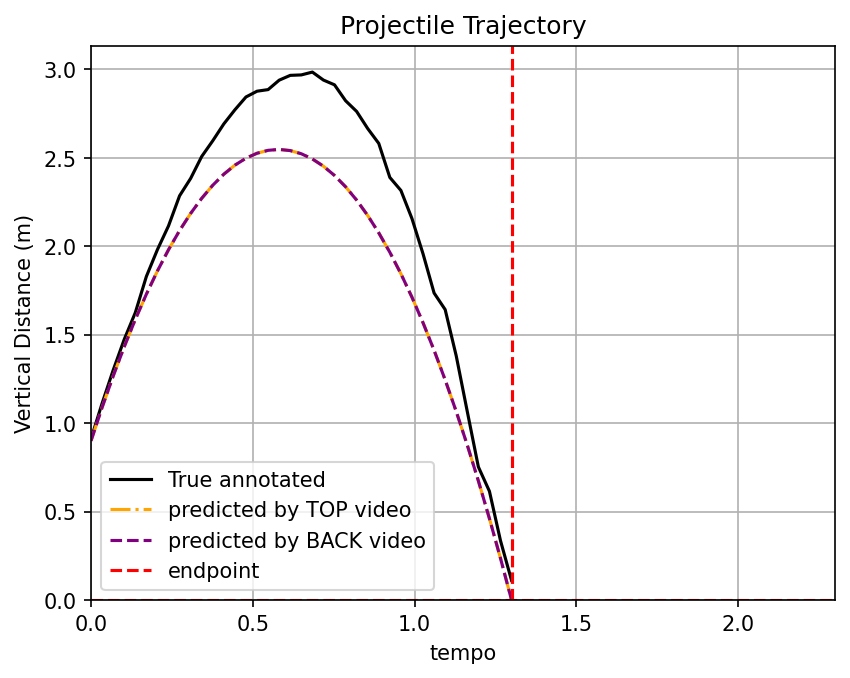

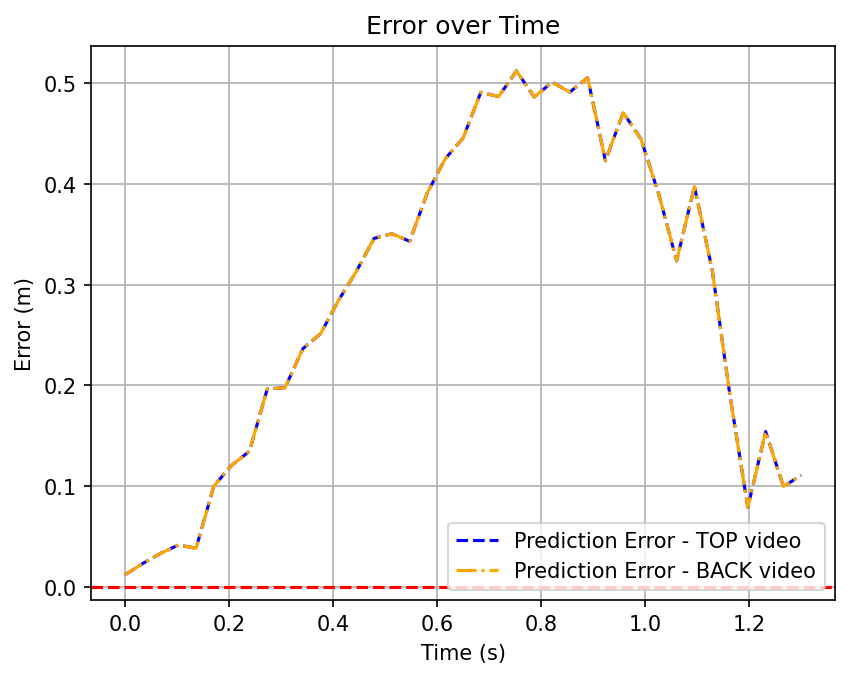

In [5]:
theta = 26.81558035131737
#true = 27.83
v0 = 12.60017121798069
phi = 14.90
X0 = 0
Y0 = 0
H_inicial = 0.90
tfinal = (576-537)/30
vx0 = v0 * np.cos(np.deg2rad(phi)) * np.cos(np.deg2rad(theta))
vy0 = v0 * np.cos(np.deg2rad(theta)) * np.sin(np.deg2rad(phi))
vz0 = v0 * np.sin(np.deg2rad(theta))
# Time array
t = np.linspace(0, tf, num=39)
# Calculate the trajectory
x = X0 + vx0 * t
y = Y0 + vy0 * t

z = H_inicial + vz0 * t - 0.5 * g * t**2

v0_back = 11.556283453252735
theta_back = 29.463583548121107
vz0_back = v0_back * np.sin(np.deg2rad(theta_back))
z_BACK = H_inicial + vz0_back * t - 0.5 * g * t**2

plt.figure(dpi=150)
# Plot the trajectory
print(vz0)
print(vz0_back)

t2 = np.linspace(0,(576-537),len(altura_t))/30
plt.plot(t2,altura_t*0.85*10**-2, label='True annotated', color='black')
plt.plot(t, z, label ='predicted by TOP video', color='orange', ls='-.')
plt.plot(t, z_BACK, label ='predicted by BACK video', color='purple', ls='--')
# Set plot labels and title
plt.xlabel("tempo")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Trajectory")

# Set axis limits to show the entire trajectory
plt.xlim(0, tf+1)
plt.ylim(0)

# Add a line at y=0 to represent the ground
plt.axhline(y=0, color='r', linestyle='--')
plt.axvline(x=1.3, color='r', linestyle='--', label='endpoint')

plt.legend()

plt.grid(True)
plt.show()

# Calculate the error
error = altura_t*0.85*10**-2 - z
error2 = altura_t*0.85*10**-2 - z_BACK

# Plot the error over time
plt.figure(dpi=150)
plt.plot(t, error, label='Prediction Error - TOP video', color='blue', ls='--')
plt.plot(t, error2, label='Prediction Error - BACK video', color='orange', ls='-.')

plt.xlabel("Time (s)")
plt.ylabel("Error (m)")
plt.title("Error over Time")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
plt.grid(True)
plt.show()

# Video 2

**Video 2 informations:**


% Lateral video %

Start frame: 81

end annotation: 109

net annotation:

end frame: Not visible

% Top video %

start frame: 84
net annotation: 104
end frame: 117


#YOLO:


X_top_inicial: 2545.0
Y_top_incial: 370.0


X_top_final: 845.0
Y_top_final: 280.0


In [91]:
import pandas as pd
import json
import math
# Assuming your JSON file is named 'data.json'
with open('person_keypoints_defaultvid2lateral.json', 'r') as file:
    data_vid2 = json.load(file)
altura_t_vid2 = []
for i in range(109-81):
    altura_px = data_vid2['annotations'][i]['keypoints'][4] - data_vid2['annotations'][i]['keypoints'][1]
    altura_t_vid2.append(altura_px)
altura_t_vid2 = np.array(altura_t_vid2)
deltax = -(data_vid2['annotations'][1]['keypoints'][0] -  data_vid2['annotations'][0]['keypoints'][0])
deltay = -(data_vid2['annotations'][1]['keypoints'][1] -  data_vid2['annotations'][0]['keypoints'][1])
angulo_z_xy = math.degrees(math.atan(deltay/deltax))
angulo_z_xy

25.009267485219716

In [95]:
altura_t_vid2*0.80

array([     44.424,      63.176,      77.752,       92.32,      108.32,      120.89,      133.45,      144.02,      154.59,      162.99,      169.58,      177.81,      180.27,      182.74,      184.39,      186.03,      187.68,      187.68,       184.8,      181.92,      174.51,      170.56,      165.63,      156.26,
            146.87,      136.01,      125.16,      111.33])

-----------------USING TOP VIDEO---------------------------------------
Deslocamento X e Y:  17.0 0.9
Angulo Phi xyplane[deg]:  3.030476845860595
Angle Theta[rad]:  0.31200271754428627
Angle theta[deg]:  17.87643891189993
V0:  16.26127058498502


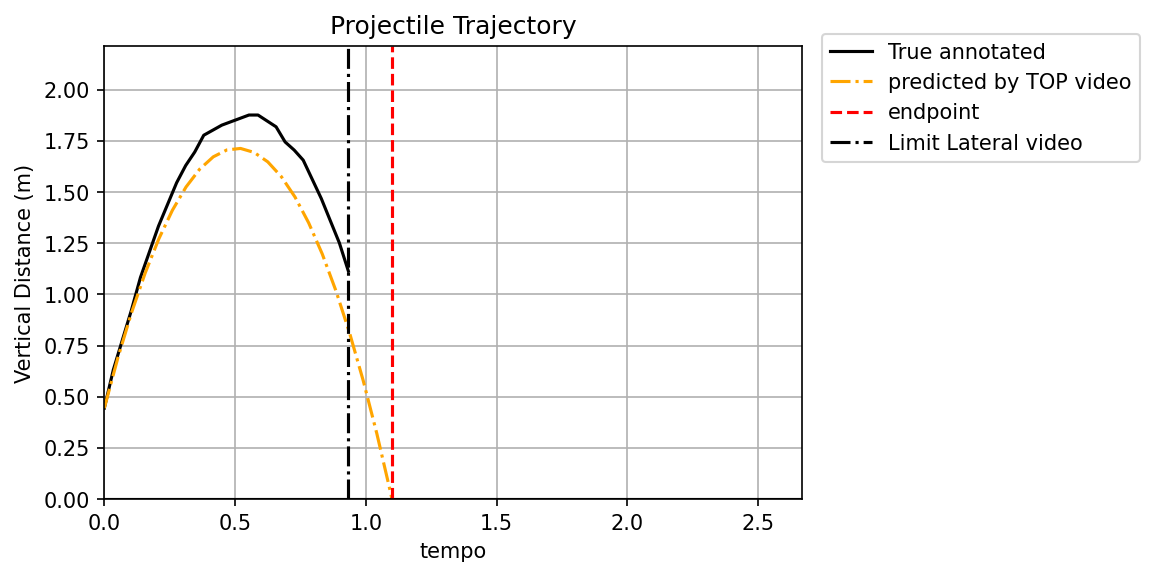

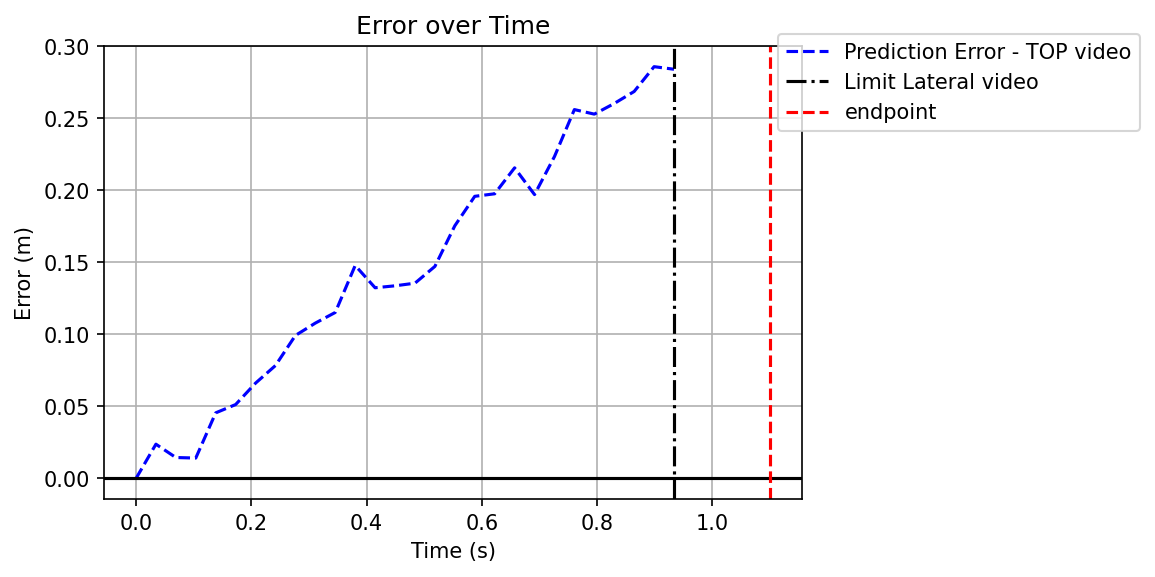

In [136]:
tf_v2= (117-84)/30
hf = 0 
hi_v2 = 0.44424
print('-----------------USING TOP VIDEO---------------------------------------')
xi_newframe = 0
yi_newframe = 0
xf_newframe = (2545.0-845.0)*10**-2
yf_newframe = (370.0-280.0)*10**-2 
print('Deslocamento X e Y: ',xf_newframe,yf_newframe)
ph_v2 =calculo_angulo_phi2(xi_newframe,xf_newframe,yi_newframe,yf_newframe)

thet_v2, v_v2 = solve_theta_v0(xi_newframe,xf_newframe,ph_v2,tf_v2,hi_v2,hf)




#CALCULANDO PELO VIDEO TOP DIRECT
theta = thet_v2
#true = 27.83
v0 = v_v2
phi = ph_v2
X0 = 0
Y0 = 0
H_inicial = hi_v2
tfinal = tf_v2
vx0 = v0 * np.cos(np.deg2rad(phi)) * np.cos(np.deg2rad(theta))
vy0 = v0 * np.cos(np.deg2rad(theta)) * np.sin(np.deg2rad(phi))
vz0 = v0 * np.sin(np.deg2rad(theta))
# Time array
t = np.linspace(0, tf, num=(117-84))
# Calculate the trajectory
x = X0 + vx0 * t
y = Y0 + vy0 * t

z2 = H_inicial + vz0 * t - 0.5 * g * t**2
#CALCULANDO PELO VIDEO BACK
# v0_back = 11.556283453252735
# theta_back = 29.463583548121107
# vz0_back = v0_back * np.sin(np.deg2rad(theta_back))
# z_BACK = H_inicial + vz0_back * t - 0.5 * g * t**2

plt.figure(dpi=150)
# # Plot the trajectory
# print(vz0)
# print(vz0_back)

t2 = np.linspace(0,28,28)/30
plt.plot(t2,altura_t_vid2*0.8*10**-2, label='True annotated', color='black')
plt.plot(t, z2, label ='predicted by TOP video', color='orange', ls='-.')
#plt.plot(t, z_BACK, label ='predicted by BACK video', color='purple', ls='--')
# Set plot labels and title
plt.xlabel("tempo")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Trajectory")

# Set axis limits to show the entire trajectory
plt.xlim(0, tf+1)
plt.ylim(0)

# Add a line at y=0 to represent the ground
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=tfinal, color='r', linestyle='--', label='endpoint')
plt.axvline(x=t2[-1], color='black', linestyle='-.', label='Limit Lateral video')

plt.legend(bbox_to_anchor=(1.5, 1.05))

plt.grid(True)
plt.show()
from scipy.interpolate import interp1d

# Interpolate the data for the smallest range
interp_function = interp1d(t2, altura_t_vid2, kind='linear', fill_value='extrapolate')
interp_function_z = interp1d(t, z2, kind='linear', fill_value='extrapolate')

t_new = np.linspace(t2[0], t2[-1], 28)  # Interpolating to match the size of z3[:28]
altura_t_vid2_interp = interp_function(t_new)
interp_function_z2 = interp_function_z(t_new)
# Calculate the error
error = altura_t_vid2_interp * 0.8 * 10**-2 - interp_function_z2

# Plot the error over time
plt.figure(dpi=150)
plt.plot(t2, error, label='Prediction Error - TOP video', color='blue', ls='--')
#plt.plot(t, error2, label='Prediction Error - BACK video', color='orange', ls='-.')

plt.xlabel("Time (s)")
plt.ylabel("Error (m)")
plt.title("Error over Time")
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=t2[-1], color='black', linestyle='-.', label='Limit Lateral video')
plt.axvline(x=tfinal, color='r', linestyle='--', label='endpoint')

plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.grid(True)
plt.show()


In [131]:
len(z3)

33

In [132]:
len(altura_t_vid2*0.8*10**-2)

28

# Video 3 

'''
Video 3 informations:

Frame start lateral: 115

Frame end lateral: (não dá para ver)


Frame start TOP: 117

Frame end TOP: 165

#YOLO:
X_top_inicial: 2564.9194
Y_top_incial: 422.7185


X_top_final: 742.0
Y_top_final: 317.0

'''

In [34]:
import pandas as pd
import json
import math
# Assuming your JSON file is named 'data.json'
with open('person_keypoints_defaultvid3lateral.json', 'r') as file:
    data_vid3 = json.load(file)
altura_t_vid3 = []
for i in range(36):
    altura_px = data['annotations'][i]['keypoints'][4] - data['annotations'][i]['keypoints'][1]
    altura_t_vid3.append(altura_px)
altura_t_vid3 = np.array(altura_t_vid3)
deltax = -(data_vid3['annotations'][1]['keypoints'][0] -  data_vid3['annotations'][0]['keypoints'][0])
deltay = -(data_vid3['annotations'][1]['keypoints'][1] -  data_vid3['annotations'][0]['keypoints'][1])
angulo_z_xy = math.degrees(math.atan(deltay/deltax))
angulo_z_xy

27.474157332864387

In [86]:
tf_v3= (165-115)/30
hf = 0 
hi_v3 = 1.2726
print('-----------------USING TOP VIDEO---------------------------------------')
xi_newframe = 0
yi_newframe = 0
xf_newframe = (2564.9194-742.0)*10**-2
yf_newframe = (422.7185-317.0)*10**-2 
print('Deslocamento X e Y: ',xf_newframe,yf_newframe)
ph_v3 =calculo_angulo_phi2(xi_newframe,xf_newframe,yi_newframe,yf_newframe)

thet_v3, v_v3 = solve_theta_v0(xi_newframe,xf_newframe,ph_v3,tf_v3,hi_v3,hf)



-----------------USING TOP VIDEO---------------------------------------
Deslocamento X e Y:  18.229194000000003 1.057185
Angulo Phi xyplane[deg]:  3.319097246460697
Angle Theta[rad]:  0.5947655116598246
Angle theta[deg]:  34.077553618046906
V0:  13.227284616223768


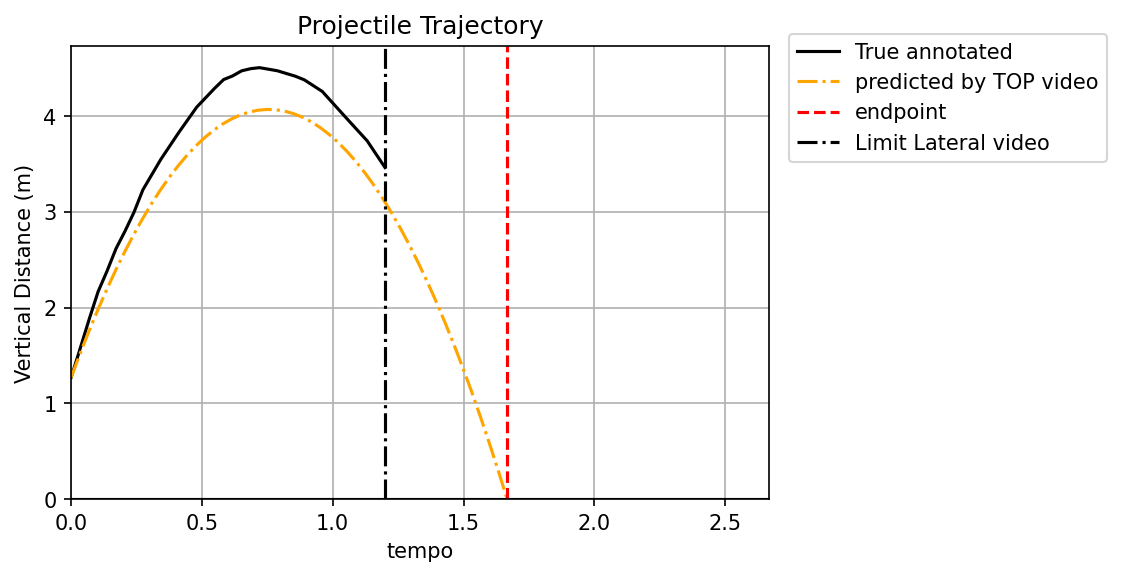

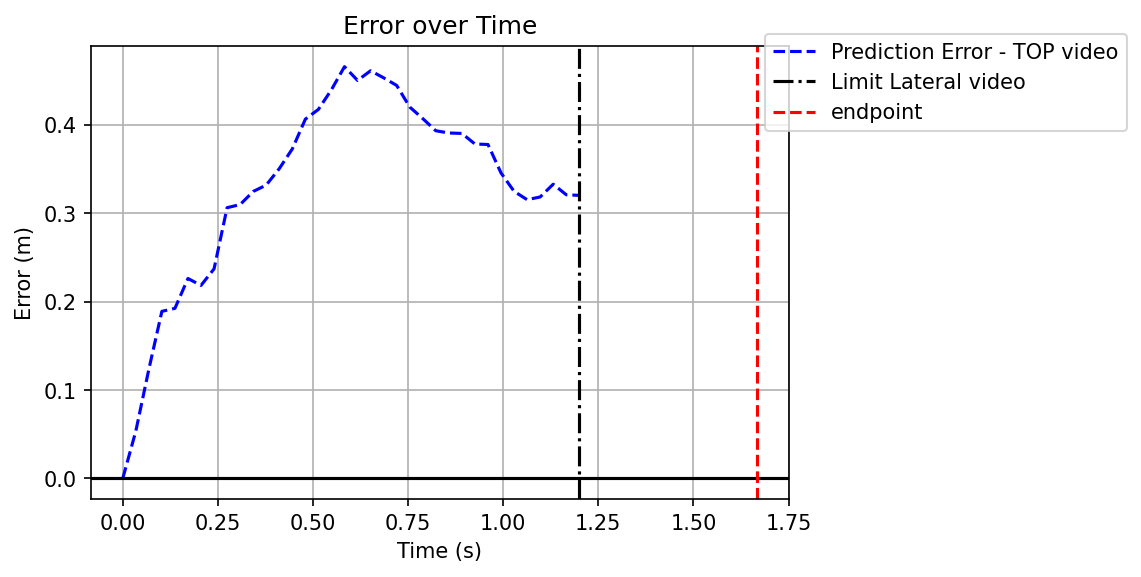

In [85]:
#CALCULANDO PELO VIDEO TOP DIRECT
theta = thet_v3
#true = 27.83
v0 = v_v3
phi = ph_v3
X0 = 0
Y0 = 0
H_inicial = hi_v3
tfinal = tf_v3
vx0 = v0 * np.cos(np.deg2rad(phi)) * np.cos(np.deg2rad(theta))
vy0 = v0 * np.cos(np.deg2rad(theta)) * np.sin(np.deg2rad(phi))
vz0 = v0 * np.sin(np.deg2rad(theta))
# Time array
t = np.linspace(0, tf, num=(165-115))
# Calculate the trajectory
x = X0 + vx0 * t
y = Y0 + vy0 * t

z3 = H_inicial + vz0 * t - 0.5 * g * t**2
#CALCULANDO PELO VIDEO BACK
# v0_back = 11.556283453252735
# theta_back = 29.463583548121107
# vz0_back = v0_back * np.sin(np.deg2rad(theta_back))
# z_BACK = H_inicial + vz0_back * t - 0.5 * g * t**2

plt.figure(dpi=150)
# # Plot the trajectory
# print(vz0)
# print(vz0_back)

t2 = np.linspace(0,36,36)/30
plt.plot(t2,altura_t_vid3*0.8*10**-2, label='True annotated', color='black')
plt.plot(t, z3, label ='predicted by TOP video', color='orange', ls='-.')
#plt.plot(t, z_BACK, label ='predicted by BACK video', color='purple', ls='--')
# Set plot labels and title
plt.xlabel("tempo")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Trajectory")

# Set axis limits to show the entire trajectory
plt.xlim(0, tf+1)
plt.ylim(0)

# Add a line at y=0 to represent the ground
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=tfinal, color='r', linestyle='--', label='endpoint')
plt.axvline(x=t2[-1], color='black', linestyle='-.', label='Limit Lateral video')

plt.legend(bbox_to_anchor=(1.5, 1.05))

plt.grid(True)
plt.show()


# Calculate the error
error = altura_t_vid3*0.8*10**-2 - z3[:36]
#error2 = altura_t*0.85*10**-2 - z_BACK

# Plot the error over time
plt.figure(dpi=150)
plt.plot(t2, error, label='Prediction Error - TOP video', color='blue', ls='--')
#plt.plot(t, error2, label='Prediction Error - BACK video', color='orange', ls='-.')

plt.xlabel("Time (s)")
plt.ylabel("Error (m)")
plt.title("Error over Time")
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=t2[-1], color='black', linestyle='-.', label='Limit Lateral video')
plt.axvline(x=tfinal, color='r', linestyle='--', label='endpoint')

plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.grid(True)
plt.show()


## Getting the coordinates informations using YOLO:

In [96]:
import cv2
def read_video1(path_video):
    cap = cv2.VideoCapture(path_video)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        
        if ret:
            frames.append(frame)
        else:
            break
    cap.release()
    #frames = frames[0:-1:2]
    return frames, fps

print('Generating Images from the Video')
frames, fps = read_video1('/tf/astrodados/phelipedata/YOLOV8/videos_coach_annotate/30fpsE02S02TOP.mp4')

Generating Images from the Video


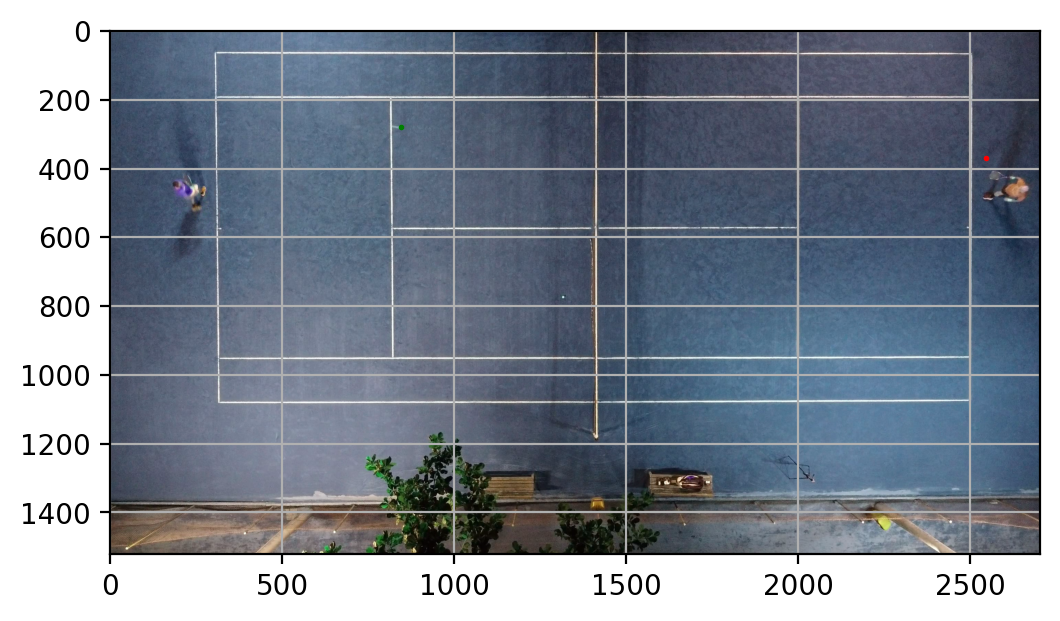

In [112]:
plt.figure(dpi=200)
plt.imshow(frames[117])
plt.grid(True)
plt.scatter(2545,370, color ='red', s=1)
plt.scatter(845,280, color ='green', s=1)
#plt.savefig('teste.png')
plt.show()


0: 384x640 4 sports balls, 48.4ms


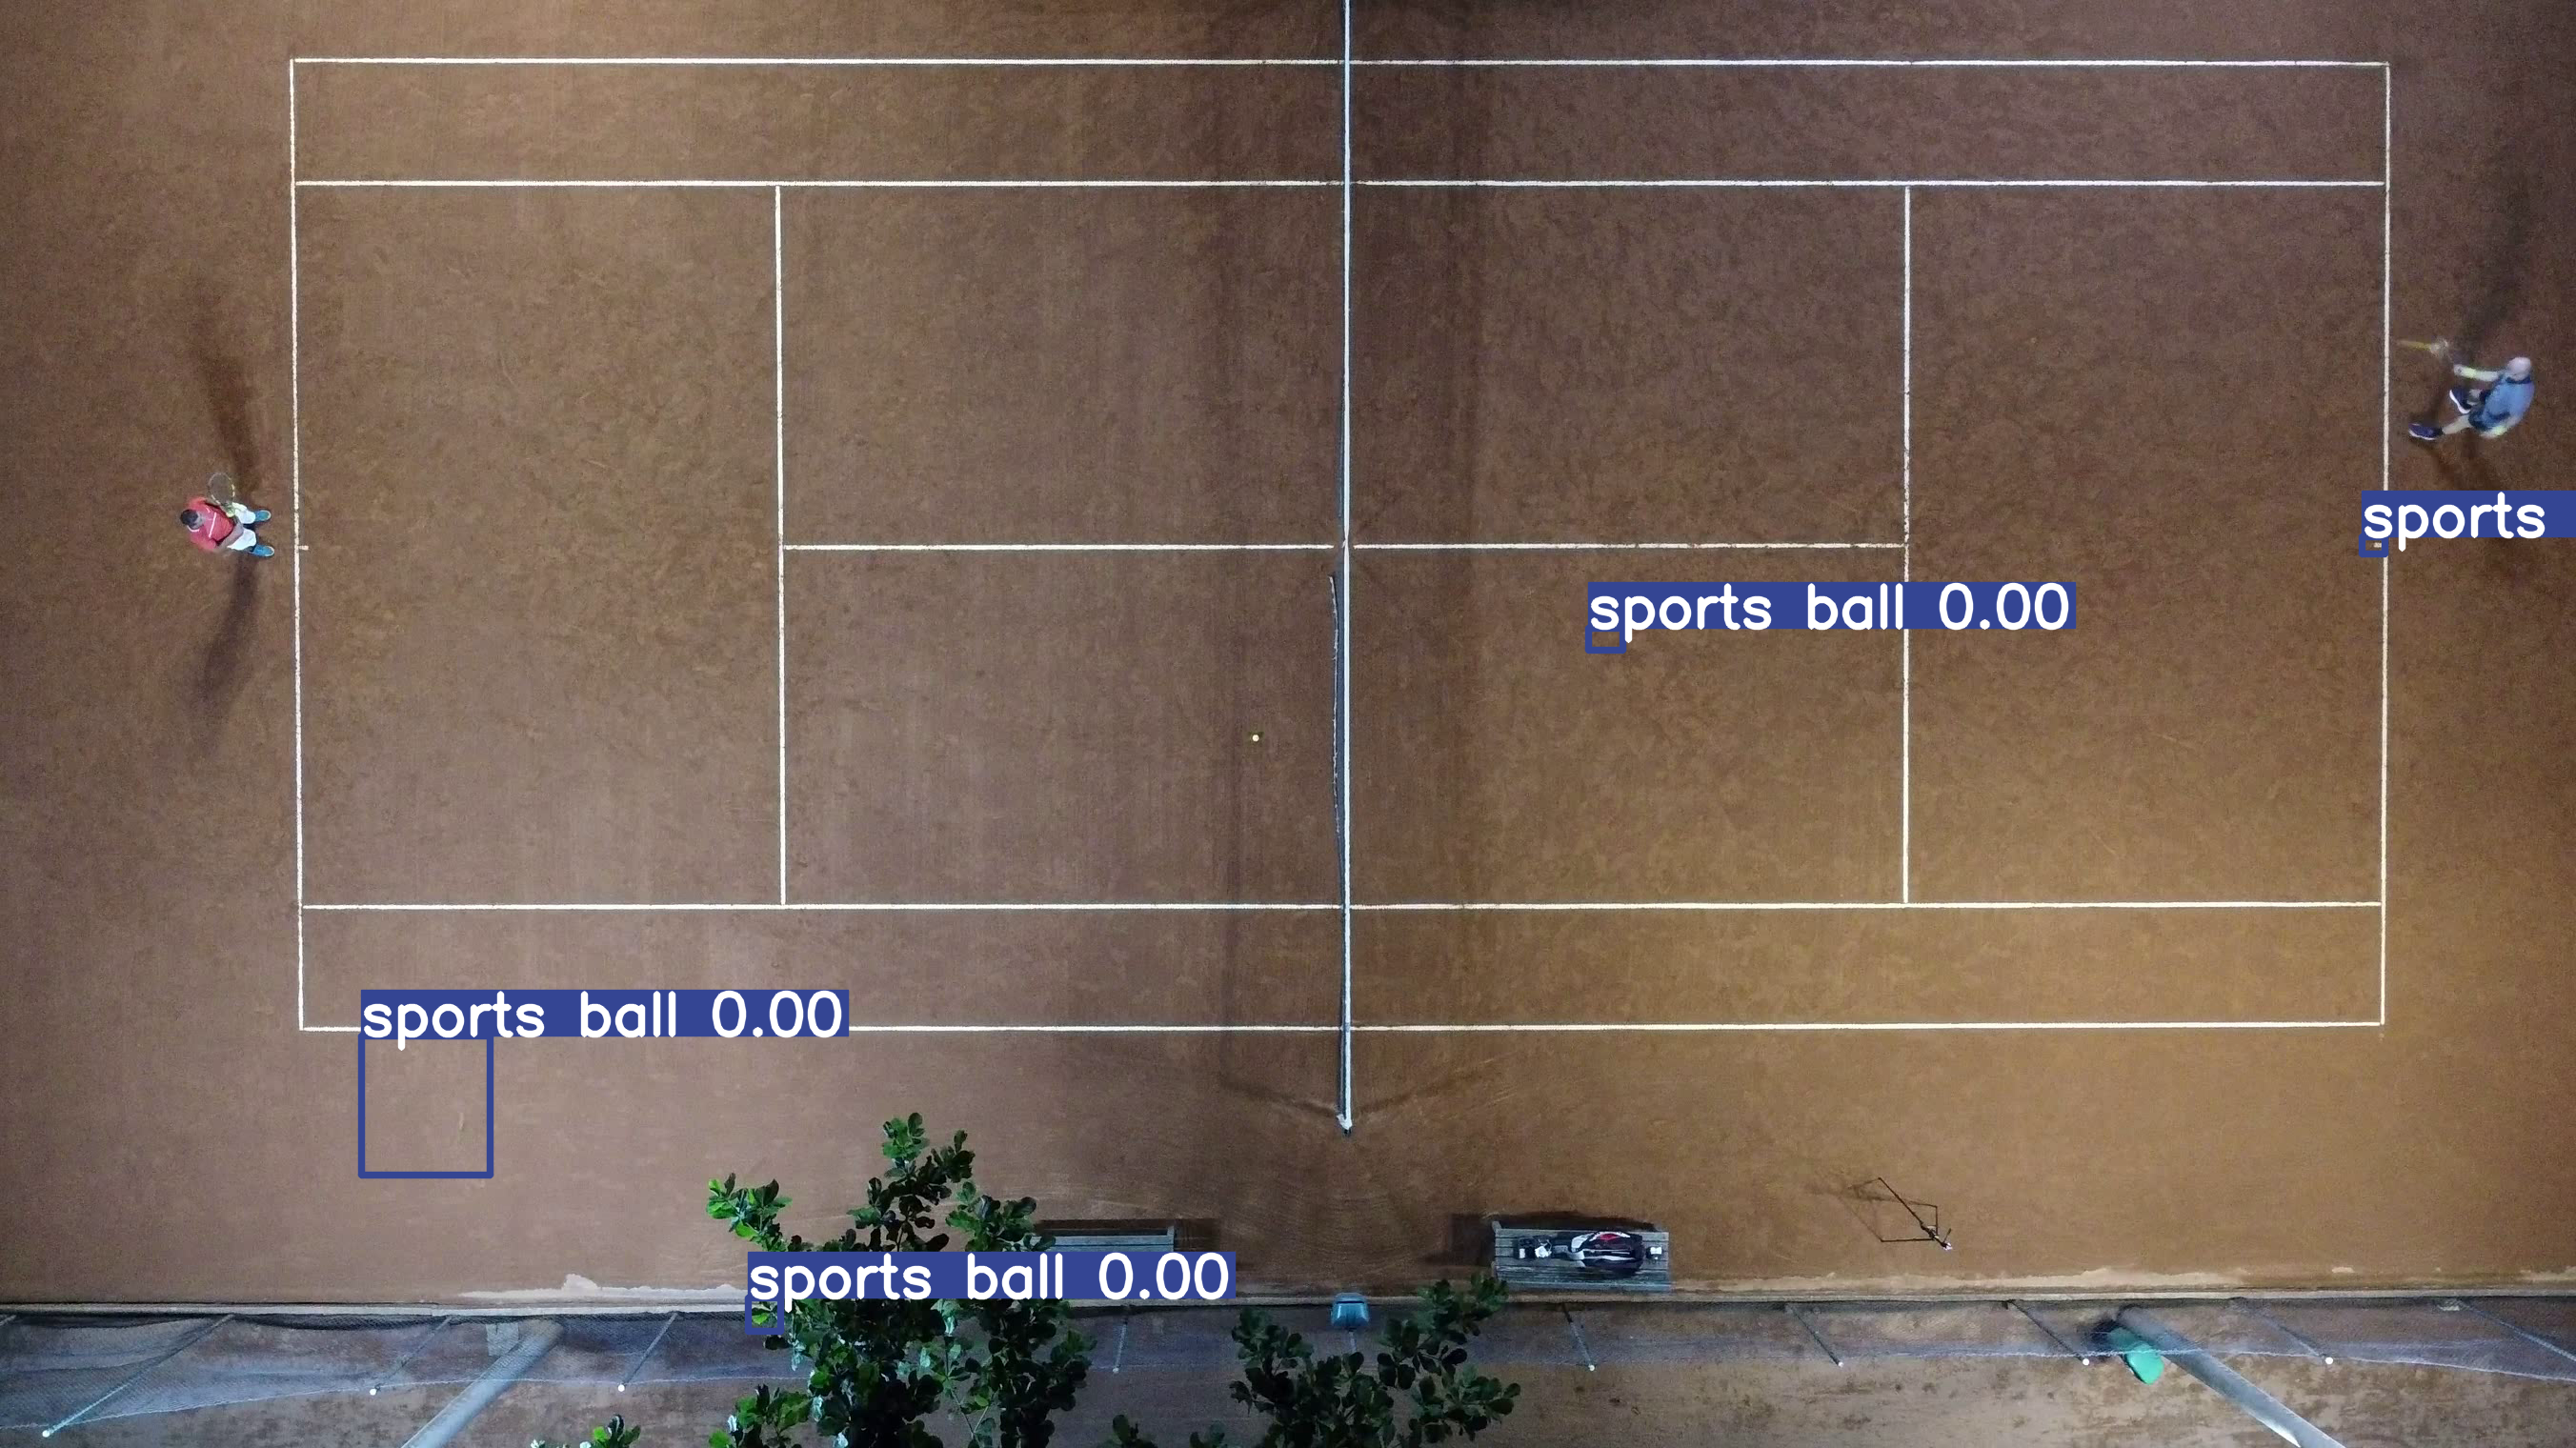

Speed: 4.9ms preprocess, 48.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


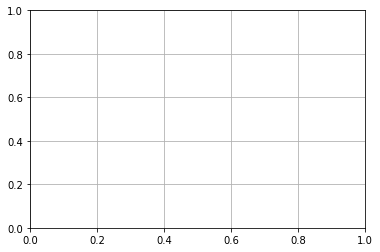

In [103]:

from ultralytics import YOLO
from PIL import Image
model = YOLO('yolov9e.pt')
#--------------------------------------------------------------------------------------------------
save_resultado = False
#--------------------------------------------------------------------------------------------------
#path ='/tf/astrodados/tarefa_multi_gpu_bola/inferencia/Ball_Dataset_G10_C1_inferred_tracks/0010.jpg'
#--------------------------------------------------------------------------------------------------
results = model.predict(frames[84], device= 'cuda:1', conf=0.000001,max_det=5,
                        save=save_resultado, 
                        project='/tf/astrodados/phelipedata/YOLOV8/Annotation_pipeline/test',
                        show_labels=True,show_conf=True,
                        show_boxes=True,save_txt=False,classes=[32],augment=False, stream=True)


#38-tennis racket
#32: 'sports ball'
#0: person
#imgsz=(1080,1920)
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs# Probs object for classification outputs
    result.save()
    result.show()  # display to screen])
plt.grid(True)
#plt.scatter(742,317, color ='red', s=1)
#plt.scatter(1920,445, color ='red', s=1)

#plt.savefig('teste.png')
plt.show()

# TESTE RAYAN

In [8]:
654.0559082*1e-2 - 248.9785156e-2

4.050773926

In [9]:
1710.953125*1e-2 -  129.016602*1e-2

15.819365229999999

In [ ]:
yhit_transformed = 654.0559082
yBounce_transformed = 248.9785156

xhit_transformed = 129.016602
xBounce_transformed = 1710.953125


frame_final = 19
frame_inicial = 9

In [10]:
117-84

33

-----------------USING TOP VIDEO---------------------------------------
Deslocamento X e Y:  15.819365229999999 4.050773926
Angulo Phi xyplane[deg]:  14.362791440348934
Angle Theta[rad]:  -0.07061216269045335
Angle theta[deg]:  -4.045778904454113
V0:  49.11166863503264


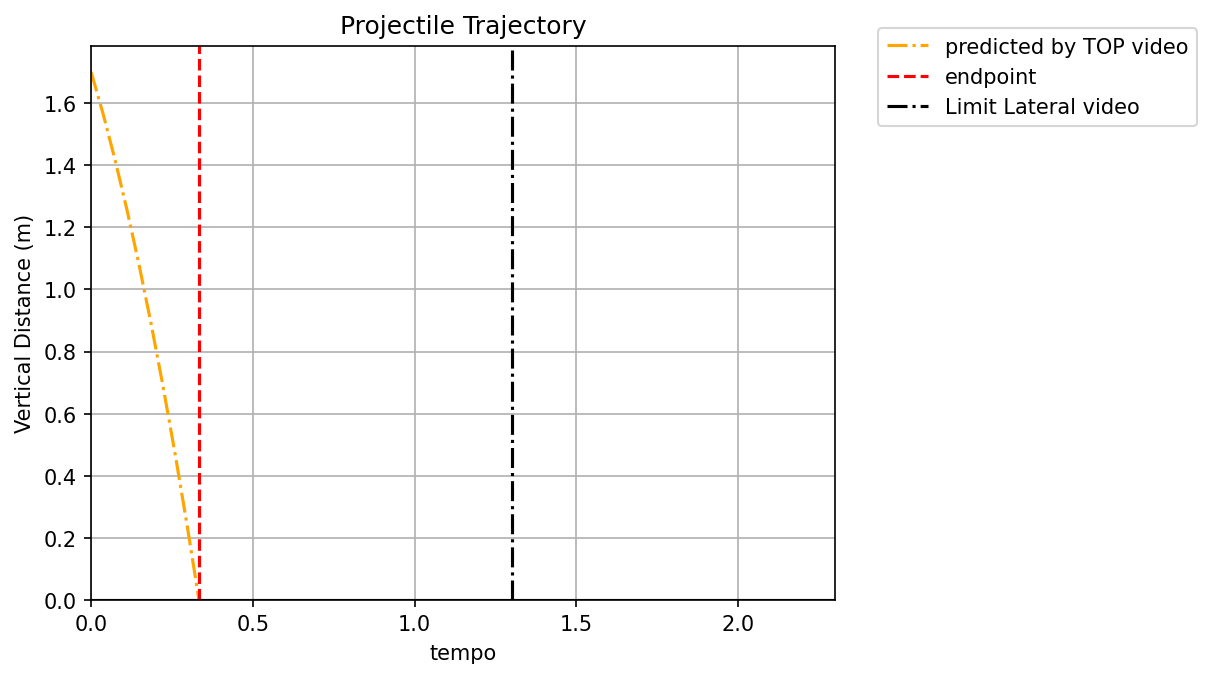

In [14]:
tf_v2= (19-9)/30
hf = 0 
hi_v2 = 1.70
print('-----------------USING TOP VIDEO---------------------------------------')
xi_newframe = 0
yi_newframe = 0
xf_newframe = 15.819365229999999
yf_newframe = 4.050773926
print('Deslocamento X e Y: ',xf_newframe,yf_newframe)
ph_v2 =calculo_angulo_phi2(xi_newframe,xf_newframe,yi_newframe,yf_newframe)

thet_v2, v_v2 = solve_theta_v0(xi_newframe,xf_newframe,ph_v2,tf_v2,hi_v2,hf)




#CALCULANDO PELO VIDEO TOP DIRECT
theta = thet_v2
#true = 27.83
v0 = v_v2
phi = ph_v2
X0 = 0
Y0 = 0
H_inicial = hi_v2
tfinal = tf_v2
vx0 = v0 * np.cos(np.deg2rad(phi)) * np.cos(np.deg2rad(theta))
vy0 = v0 * np.cos(np.deg2rad(theta)) * np.sin(np.deg2rad(phi))
vz0 = v0 * np.sin(np.deg2rad(theta))
# Time array
t = np.linspace(0, tf_v2, num=(int(tf_v2*30)))
# Calculate the trajectory
x = X0 + vx0 * t
y = Y0 + vy0 * t

z2 = H_inicial + vz0 * t - 0.5 * g * t**2
#CALCULANDO PELO VIDEO BACK
# v0_back = 11.556283453252735
# theta_back = 29.463583548121107
# vz0_back = v0_back * np.sin(np.deg2rad(theta_back))
# z_BACK = H_inicial + vz0_back * t - 0.5 * g * t**2

plt.figure(dpi=150)
# # Plot the trajectory
# print(vz0)
# print(vz0_back)

#t2 = np.linspace(0,28,28)/30
#plt.plot(t2,altura_t_vid2*0.8*10**-2, label='True annotated', color='black')
plt.plot(t, z2, label ='predicted by TOP video', color='orange', ls='-.')
#plt.plot(t, z_BACK, label ='predicted by BACK video', color='purple', ls='--')
# Set plot labels and title
plt.xlabel("tempo")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Trajectory")

# Set axis limits to show the entire trajectory
plt.xlim(0, tf+1)
plt.ylim(0)

# Add a line at y=0 to represent the ground
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=tfinal, color='r', linestyle='--', label='endpoint')
plt.axvline(x=t2[-1], color='black', linestyle='-.', label='Limit Lateral video')

plt.legend(bbox_to_anchor=(1.5, 1.05))

plt.grid(True)
plt.show()
# from scipy.interpolate import interp1d

# # Interpolate the data for the smallest range
# interp_function = interp1d(t2, altura_t_vid2, kind='linear', fill_value='extrapolate')
# interp_function_z = interp1d(t, z2, kind='linear', fill_value='extrapolate')

# t_new = np.linspace(t2[0], t2[-1], 28)  # Interpolating to match the size of z3[:28]
# altura_t_vid2_interp = interp_function(t_new)
# interp_function_z2 = interp_function_z(t_new)
# # Calculate the error
# error = altura_t_vid2_interp * 0.8 * 10**-2 - interp_function_z2

# # Plot the error over time
# plt.figure(dpi=150)
# plt.plot(t2, error, label='Prediction Error - TOP video', color='blue', ls='--')
# #plt.plot(t, error2, label='Prediction Error - BACK video', color='orange', ls='-.')

# plt.xlabel("Time (s)")
# plt.ylabel("Error (m)")
# plt.title("Error over Time")
# plt.axhline(y=0, color='black', linestyle='-')
# #plt.axvline(x=t2[-1], color='black', linestyle='-.', label='Limit Lateral video')
# #plt.axvline(x=tfinal, color='r', linestyle='--', label='endpoint')

# plt.legend(bbox_to_anchor=(1.5, 1.05))
# plt.grid(True)
# plt.show()
